<a href="https://colab.research.google.com/github/blaewood/Python_AI_Programming/blob/main/AIepoch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170508288/170498071 [==============================] - 2s 0us/step
Epoch 1/20
313/313 - 15s - loss: 1.5520 - accuracy: 0.4345 - val_loss: 1.2574 - val_accuracy: 0.5500 - 15s/epoch - 47ms/step
Epoch 2/20
313/313 - 3s - loss: 1.1732 - accuracy: 0.5843 - val_loss: 1.0759 - val_accuracy: 0.6262 - 3s/epoch - 10ms/step
Epoch 3/20
313/313 - 3s - loss: 0.9696 - accuracy: 0.6607 - val_loss: 1.0100 - val_accuracy: 0.6460 - 3s/epoch - 10ms/step
Epoch 4/20
313/313 - 3s - loss: 0.8372 - accuracy: 0.7082 - val_loss: 0.9046 - val_accuracy: 0.6829 - 3s/epoch - 10ms/step
Epoch 5/20
313/313 - 3s - loss: 0.7040 - accuracy: 0.7545 - val_loss: 0.8567 - val_accuracy: 0.7054 - 3s/epoch - 10ms/step
Epoch 6/20
313/313 - 3s - loss: 0.6014 - accuracy: 0.7893 - val_loss: 0.8331 - val_accuracy: 0.7194 - 3s/epoch - 9ms/step
Epoch 7/20
313/313 - 3s - loss: 0.4983 - accuracy: 0.8265 - val_loss: 0.8209 - val_accuracy: 0.7250 - 3s/epoch - 10ms/step
Epoch 8/20
313/313 - 3s - loss: 0.3959 - accuracy: 0.8624 - val_loss: 0

{'boxes': [<matplotlib.lines.Line2D at 0x7fd8af203610>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd88c7f9810>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd8ae314710>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd88c7f9110>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd8c41a8710>,
  <matplotlib.lines.Line2D at 0x7fd8ae0b7910>]}

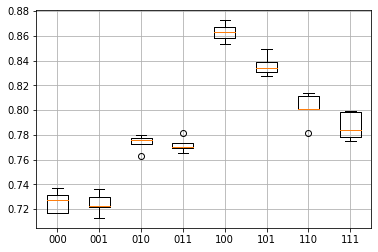

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold
from tensorflow.keras import regularizers

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 하이퍼 매개변수 설정
batch_siz=128
n_epoch=20
k=5 # k-folds

# 하이퍼 매개변수에 따라 교차 검증을 수행하고 정확률을 반환하는 함수
def cross_validation(data_gen,dropout_rate,l2_reg):
    accuracy=[]
    for train_index,val_index in KFold(k).split(x_train):
        xtrain,xval=x_train[train_index],x_train[val_index]
        ytrain,yval=y_train[train_index],y_train[val_index]

        # 신경망 모델 설계
        cnn=Sequential()
        cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
        cnn.add(Conv2D(32,(3,3),activation='relu'))
        cnn.add(MaxPooling2D(pool_size=(2,2)))
        cnn.add(Dropout(dropout_rate[0]))
        cnn.add(Conv2D(64,(3,3),activation='relu'))
        cnn.add(Conv2D(64,(3,3),activation='relu'))
        cnn.add(MaxPooling2D(pool_size=(2,2)))
        cnn.add(Dropout(dropout_rate[1]))
        cnn.add(Flatten())
        cnn.add(Dense(512,activation='relu'))
        cnn.add(Dropout(dropout_rate[2]))
        cnn.add(Dense(10,activation='softmax',kernel_regularizer=regularizers.l2(l2_reg)))

        # 신경망을 학습하고 정확률 평가
        cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
        if data_gen:
            generator=ImageDataGenerator(rotation_range=3.0,width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
            cnn.fit(generator.flow(x_train,y_train,batch_size=batch_siz),epochs=n_epoch,validation_data=(x_test,y_test),verbose=2)
        else:
            cnn.fit(xtrain,ytrain,batch_size=batch_siz,epochs=n_epoch, validation_data=(x_test,y_test),verbose=2)
        accuracy.append(cnn.evaluate(xval,yval,verbose=0)[1])
    return accuracy

# 하이퍼 매개변수를 달리 하며 신경망 모델을 평가
acc_000=cross_validation(False,[0.0,0.0,0.0],0.0)
acc_001=cross_validation(False,[0.0,0.0,0.0],0.01)
acc_010=cross_validation(False,[0.25,0.25,0.5],0.0)
acc_011=cross_validation(False,[0.25,0.25,0.5],0.01)
acc_100=cross_validation(True,[0.0,0.0,0.0],0.0)
acc_101=cross_validation(True,[0.0,0.0,0.0],0.01)
acc_110=cross_validation(True,[0.25,0.25,0.5],0.0)
acc_111=cross_validation(True,[0.25,0.25,0.5],0.01)

print("출력 형식: [Data augmentation-Dropout-l2 regularizer] (교차검증 시도/평균)")
print("[000] (",acc_000,"/",np.array(acc_000).mean(),")")
print("[001] (",acc_001,"/",np.array(acc_001).mean(),")")
print("[010] (",acc_010,"/",np.array(acc_010).mean(),")")
print("[011] (",acc_011,"/",np.array(acc_011).mean(),")")
print("[100] (",acc_100,"/",np.array(acc_100).mean(),")")
print("[101] (",acc_101,"/",np.array(acc_101).mean(),")")
print("[110] (",acc_110,"/",np.array(acc_110).mean(),")")
print("[111] (",acc_111,"/",np.array(acc_111).mean(),")")

import matplotlib.pyplot as plt

# 박스 플롯으로 정확률 표시
plt.grid()
plt.boxplot([acc_000,acc_001,acc_010,acc_011,acc_100,acc_101,acc_110,acc_111],labels=["000","001","010","011","100","101","110","111"])